In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Kmeans Algo  :

  * import data
  * seperate x and y (cultivator)
  * scale the x values using zscore
  * implement k-means algo to the scaled data
  * find the optimal k
  * compare the results with y

# PCA
  
  * import data 
  * seperate x and y
  * scale the x values using zscore
  * do the pca reduction
  * find optimal n_components
  * use the pca components for prediction
  * use knn model to do the prediction

In [42]:
df=pd.read_csv('C:/Users/The Josephs/Desktop/wine.xls', names=['Cultivator','alcohol','malic_acid','ash','alcalinity_of_ash','Magnsium','total_phenols','flavanoids','non_flavanoids_phenols','proanthocyanins','color_intensity','hue','OD280/OD315','proline'])

In [43]:
df.head()

,Cultivator,alcohol,malic_acid,ash,alcalinity_of_ash,Magnsium,total_phenols,flavanoids,non_flavanoids_phenols,proanthocyanins,color_intensity,hue,OD280/OD315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [44]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Cultivator                178 non-null int64
alcohol                   178 non-null float64
malic_acid                178 non-null float64
ash                       178 non-null float64
alcalinity_of_ash         178 non-null float64
Magnsium                  178 non-null int64
total_phenols             178 non-null float64
flavanoids                178 non-null float64
non_flavanoids_phenols    178 non-null float64
proanthocyanins           178 non-null float64
color_intensity           178 non-null float64
hue                       178 non-null float64
OD280/OD315               178 non-null float64
proline                   178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [45]:
x=df.drop('Cultivator',axis=1)
y=df['Cultivator']

In [60]:
y.value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

In [46]:
x

,alcohol,malic_acid,ash,alcalinity_of_ash,Magnsium,total_phenols,flavanoids,non_flavanoids_phenols,proanthocyanins,color_intensity,hue,OD280/OD315,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


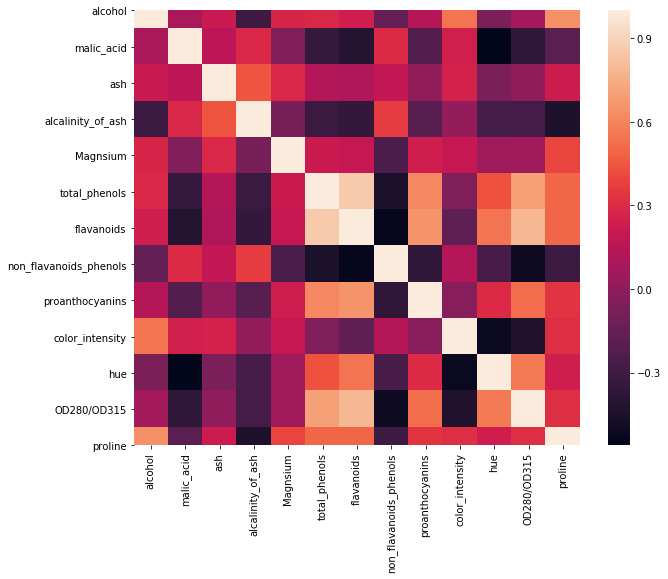

In [59]:
# gives the correlation between the variables, there is a bit of  correlation between alcalinity of ash and ash, also between
# hue and 0D280
corr_matrix=x.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix)

In [48]:
from scipy.stats import zscore
x_scaled = x.apply(zscore) # The continuous features become identical in terms of the range, after a scaling process.
x_scaled.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,Magnsium,total_phenols,flavanoids,non_flavanoids_phenols,proanthocyanins,color_intensity,hue,OD280/OD315,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### KMeans Clustering

Text(0, 0.5, 'ssd values ')

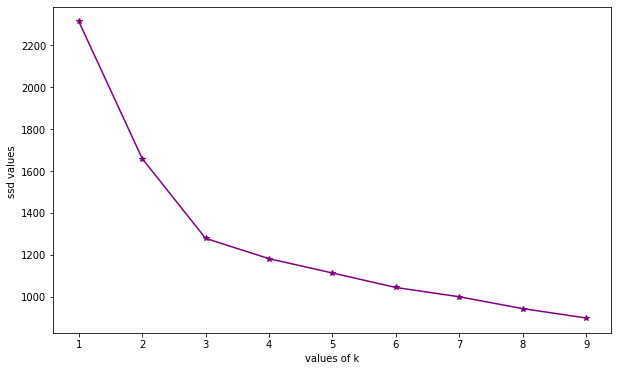

In [49]:
# to plot ssd values for respective k number of clusters



from sklearn.cluster import KMeans

ssd=[]
for k in range(1,10):
    kmeans= KMeans(n_clusters=k, random_state=3)
    kmeans.fit(x_scaled)
    ssd.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1,10),ssd,color='purple',marker='*')
plt.xlabel('values of k')
plt.ylabel('ssd values ')



# an elbow is formed in k values =3 , therefore we can identify that the data is grouped in 3 clusters.
# Therefore  the optimal k is 3

In [50]:
pd.DataFrame(ssd) 
# there is less difference between the ssd of 3 and 4, therefore 3 could be ideal cluster size,
# we also see that a strong elbow is formed when k value is 3. 

,0
0,2314.000000
1,1659.007967
2,1277.928489
3,1181.001838
4,1112.688423
5,1043.380005
6,999.077108
7,942.513129
8,897.770498


In [54]:
# clustering using the optimal k
kmeans=KMeans(n_clusters=3,random_state=1)# assigning the clusters
kmeans.fit(x_scaled)# fit the model with the scaled dataset
kmeans_predict_cluster=kmeans.predict(x_scaled)# predict the clusters

df_kmeans=x_scaled.copy(deep=True)

df_kmeans['label']= kmeans_predict_cluster 
#note: kmeans_predict_cluster is an array

In [65]:
df_kmeans['label']=df_kmeans['label'].replace({0:3})

# note : renaming the cluster number according to the original cluster makes it easier to compare and validate 

Text(0.5, 0.92, '3d plot of kmeans clustering')

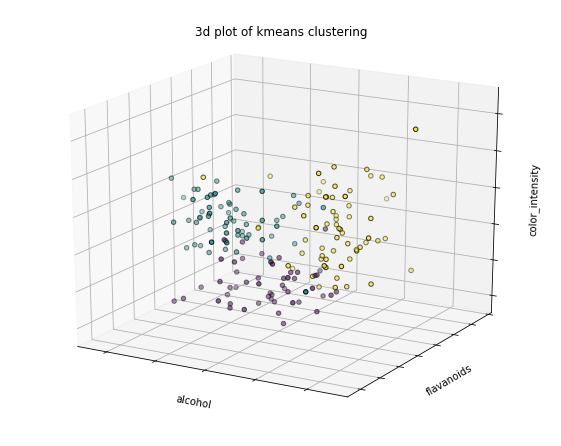

In [69]:
#3d scatter plot of the clusters formed for 3 features as an example.

from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,6))
ax=Axes3D(fig,rect=[0,0,.95,1],elev=20,azim=120)
kmeans.fit(x_scaled)
labels=kmeans.labels_
ax.scatter(x_scaled.iloc[:,0],x_scaled.iloc[:,2],x_scaled.iloc[:,10],c=labels.astype(np.float),edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('alcohol')
ax.set_ylabel('flavanoids')
ax.set_zlabel('color_intensity')
ax.set_title('3d plot of kmeans clustering')

In [70]:
# compare the results with original y variable.
print('cluster count of kmeans data:\n',df_kmeans['label'].value_counts(),'\n')
print('cluster count of original data:\n',y.value_counts())

cluster count of kmeans data:
 2    65
1    62
3    51
Name: label, dtype: int64 

cluster count of original data:
 2    71
1    59
3    48
Name: Cultivator, dtype: int64


In [76]:
x_cluster= x.join(df_kmeans['label']) # you can join only a dataframe with a datframe

x_cluster.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,Magnsium,total_phenols,flavanoids,non_flavanoids_phenols,proanthocyanins,color_intensity,hue,OD280/OD315,proline,label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [78]:
# by aggregating the data by mean per cluster.... 
#we are able to compare the kmean cluster performane with the original y feature.

x_cluster.groupby('label').agg('mean')

,alcohol,malic_acid,ash,alcalinity_of_ash,Magnsium,total_phenols,flavanoids,non_flavanoids_phenols,proanthocyanins,color_intensity,hue,OD280/OD315,proline
label,,,,,,,,,,,,,
1,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
3,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824


In [74]:
df.groupby('Cultivator').agg('mean')

,alcohol,malic_acid,ash,alcalinity_of_ash,Magnsium,total_phenols,flavanoids,non_flavanoids_phenols,proanthocyanins,color_intensity,hue,OD280/OD315,proline
Cultivator,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


Inference:  by aggregating the data by mean per cluster.... we are able to compare the kmean cluster performane with the original data clusters. The performance of kmean clustering algorithm is pretty good in classifying the datas.


### PCA: Principal Component Analysis

In [80]:
# decomposition of data using principal component analysis
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(x_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [81]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [82]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [155]:
pca=PCA(n_components=2) 
x_reduced=pca.fit_transform(x_scaled)

In [156]:
x_reduced.shape

(178, 2)

In [157]:
df_reduced=pd.DataFrame(x_reduced)
df_reduced.head() # the reduced dataframe

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [158]:
# using the dataframe of principle component we fit a model and find the accuracy of its prediction.
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_reduced, y ,test_size=0.3,random_state=42)

In [159]:
pd.DataFrame(x_train)

,0,1
0,-3.094276,-0.348843
1,0.392354,2.098732
2,1.262931,0.770850
3,1.384862,-0.658640
4,0.746666,2.312932
...,...,...
119,1.657682,0.956712
120,-0.366267,2.169353
121,4.312784,-2.095976
122,-1.932556,1.559495


In [160]:

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [161]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [162]:
from sklearn.metrics import classification_report as cr
y_pred=knn.predict(x_test)
accuracy_score=knn.score(y_test,y_pred)
print('Accuracy_score:', accuracy_score)


print('classifiaction report:\n', cr (y_test,y_pred) )


Accuracy_score: 0.9814814814814815
classifiaction report:
               precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



note: when i gave pca variance as 5 i get 96% accuracy and pca variance as 2 i get 98% accuracy, this in my opinion there is too much redundancy of info may be and there is noise in the data, when the noise is reduced the accuracy of predicting the value goes up pertaining to pca alone, but always pca value gives a lesser accuracy when compared to the original data that is fit in best of the models that gives better accuracy prediction!

In [163]:
# for comaprison we fit the original data in kkn and check for prediction accuracy.

In [130]:

x_train,x_test,y_train,y_test=train_test_split(x_scaled, y ,test_size=0.3,random_state=42)

In [131]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [132]:
from sklearn.metrics import classification_report as cr

accuracy_score=knn.score(y_test,y_pred)
print('Accuracy_score:', accuracy_score)

y_pred=knn.predict(x_test)
print('classifiaction report:\n', cr (y_test,y_pred) )


Accuracy_score: 0.9629629629629629
classifiaction report:
               precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.90      0.95        21
           3       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



Inference: even though we reduced the features to 5 using  pca , the accuracy of the prediction is pretty good. PCA helps in retaining the information by reducing the noise thus helps in faster calculation and limited technology to handle large data.   
    